# <h1 align="center"> Analytic and Numeric Solution of ODE Logistic </h1>  

# <h3> Numeric Method: Runge kutta 3th order </h3>

### If we have Cauchy initial condition  
\begin{align*}
y' &= f(t, y) \\
y(t_0) &= y_0
\end{align*}
### the numerical solution of y(t) will be calculated by
\begin{align*}
k1 &= f(t_{i-1}, y_{i-1}) \\
k2 &= f(t_{i-1} + h, y_{i-1} + h*k1) \\
k3 &= f\left(t_{i-1} + \frac{h}{2}, y_{i-1} + \frac{h}{2}*\frac{k1 + k2}{2}\right) \\
y_i &= y_{i-1} + \frac{h}{6}(k1 + k2 + 4*k3) \\
\end{align*}
### con *h* el tamaño de paso, e $i = 1,2, … , n$


----
Referencias:
* Corless & Fillion (2013). A Graduate Introduction to Numerical Methods, Springer. pág. 617

---

Autor: Roberto Méndez Méndez <br>
Created: 2024 <br>
Editado: Feb 20 2025 - v4

### Solución númerica de la EDO Logistica

In1838, Pierre-Francois
Verhulst argued that the growth rate should depend on the population
level, which implicitly assumes dependence on resource.If the population is low the rate of growth is positive and if it is high the rate is
negative.Verhulst proposed the differential equation, which he termed
the logistic equation,

\begin{align*}
\frac{dy}{dt} &= ry\left(1 - \frac{y}{K}\right) \\
y(t_0) &= y_0
\end{align*}

where $K > 0$ is the "carrying capacity" and $r > 0$ "growth rate", both constants. <br>
La solución analítica de esta EDO es
\begin{equation*}
y(t) = \frac{y_0K}{y_0 + (K - y_0)e^{r(t_0 - t)}}
\end{equation*}
### Para la sustitución numérica, consideramos
\begin{align*}
f(t,y) &= ry\left(1 - \frac{y}{K}\right),\\
t_0 &= t_0 \hspace{.7cm} \\
y_0 &= y(t_0)
\end{align*}
así para este caso el método RK toma la forma
\begin{align*}
k1 &= r*y_{i-1}\left(1 - \frac{y_{i-1}}{k}\right) \\
k2 &= r*[y_{i-1} + h*k1]*\left(1 - \frac{y_{i-1} + h*k1}{k}\right) \\
k3 &= r*\left(y_{i-1} + h*\frac{k1 + k2}{4}\right)*\left(1 - \frac{1}{K}\left[y_{i-1} + h*\frac{k1 + k2}{4}\right]\right)  \\
y_i &= y_{i-1} + \frac{h}{6}(k1 + k2 + 4*k3) \\
\end{align*}

con $i \in \{1, 2, 3, \ldots, n\}$

---

Referencias:

* Mathematical Modeling the Life Sciences Numeric Python y Matlab  2023 Cogan
 pág. 53.  Texto histórico
* Mathematical Analysis of Infectious Diseases 2022 ed  Agarwal Nieto pág. 5 (solución analítica de la logística con $t_0 = 0$)
* Solving Ordinary Differential Equations in Python  2024 Sundnes pag 9  (Numeric Solution)


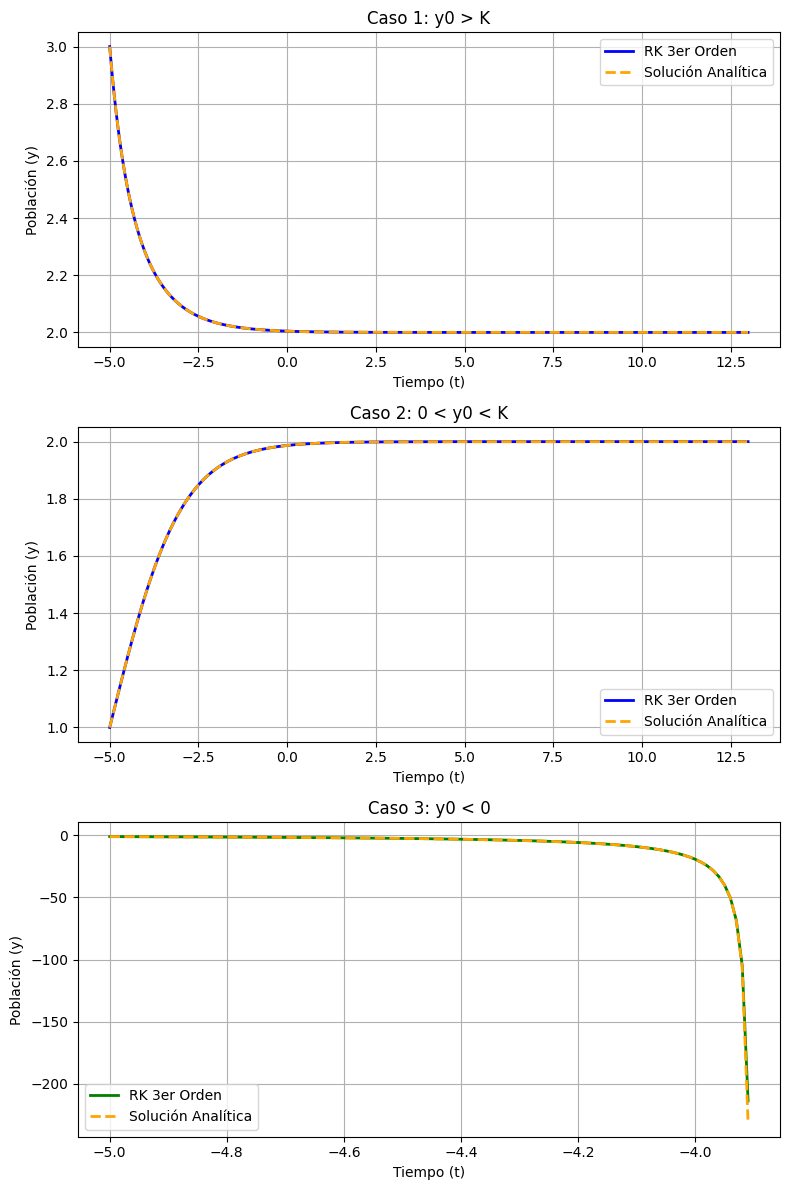

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la ecuación logística
K = 2      # Capacidad de carga
r = 1      # Tasa de crecimiento

# Condiciones Iniciales
t0 = -5    # Tiempo inicial
tf = 13    # Tiempo final
h = 0.01   # Tamaño del paso
t = np.arange(t0, tf, h)  # Rango de tiempo
# Valores iniciales para los tres casos
y0_cases = [3, 1, -1]  # Caso 1: y0 > K, Caso 2: 0 < y0 < K, Caso 3: y0 < 0

# Método numérico Runge-Kutta de tercer orden
def runge_kutta_3(y0, K, r, t, h):
    y = np.zeros(len(t))
    y[0] = y0  # Condición inicial
    for i in range(len(t) - 1):
        k1 = r * y[i] * (1 - y[i] / K)
        k2 = r * (y[i] + h * k1) * (1 - (y[i] + h * k1) / K)
        k3 = r * (y[i] + h * (k1 + k2) / 4) * (1 - (y[i] + h * (k1 + k2) / 4) / K)
        y[i+1] = y[i] + h * (k1 + k2 + 4 * k3) / 6
    return y

# Solución analítica de la ecuación logística
def solucion_analitica(y0, K, r, t, t0):
    return K * y0 / (y0 + (K - y0) * np.exp(r * t0) * np.exp(-r * t))

# Crear subplots para cada caso
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
titles = ['Caso 1: y0 > K', 'Caso 2: 0 < y0 < K', 'Caso 3: y0 < 0']

for i, y0 in enumerate(y0_cases):
    # Solución numérica y analítica
    if i <= 1:
        y_rk = runge_kutta_3(y0, K, r, t, h)
        y_exact = solucion_analitica(y0, K, r, t, t0)
    else:
        t = np.arange(t0, -3.9, h)  # Rango de tiempo
        y_rk = runge_kutta_3(y0, K, r, t, h)
        y_exact = solucion_analitica(y0, K, r, t, t0)

    # Graficar en subplots
    ax = axes[i]
    if i <= 1:
        ax.plot(t, y_rk, color='blue', linestyle="-", linewidth=2,
                label='RK 3er Orden')
        ax.plot(t, y_exact, color='orange', linestyle="--", linewidth=2,
                label='Solución Analítica')
    else:
        ax.plot(t, y_rk, color='green', linestyle="-", linewidth=2,
            label='RK 3er Orden')
        ax.plot(t, y_exact, color='orange', linestyle="--", linewidth=2,
            label='Solución Analítica')
    ax.set_xlabel('Tiempo (t)')
    ax.set_ylabel('Población (y)')
    ax.set_title(titles[i])
    ax.legend()
    ax.grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()